In [1]:
# pandas, numpy, matplotlib, seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# current working directory
import os
os.getcwd()

'/Users/hoeunsin/PerfectGuide-master/Exercise'

In [3]:
# change the directory
os.chdir('/Users/hoeunsin/PerfectGuide-master/Data/titanic')

In [4]:
# check files in the current directory
os.listdir()

['titanic_test.csv', 'gender_submission.csv', 'titanic_train.csv']

In [5]:
# read csv
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

## 1. EDA

## 1) Statistics

In [6]:
# eda
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [8]:
# info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# describe
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Object type Features
train.dtypes[train.dtypes=='object'].index.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [11]:
# numeric Features
train.dtypes[train.dtypes!='object'].index.tolist()

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [12]:
# na check
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# na feature visualization

In [14]:
# Age na rows
train.loc[train['Age'].isna(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


<AxesSubplot:xlabel='Age', ylabel='Count'>

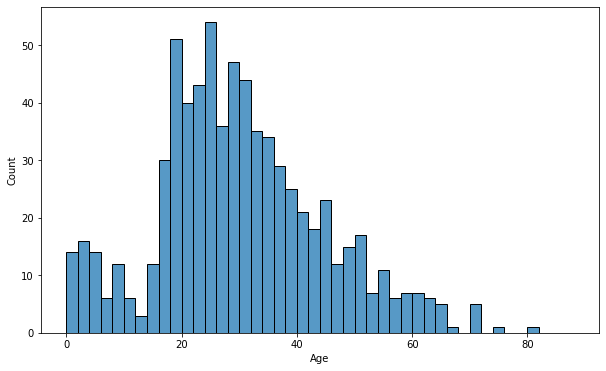

In [15]:
# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(data=train, x='Age', bins=range(0,90,2))

In [16]:
# boxplot Age x Categorical features
cat_features = ['Sex', 'Pclass', 'Cabin', 'Embarked']

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

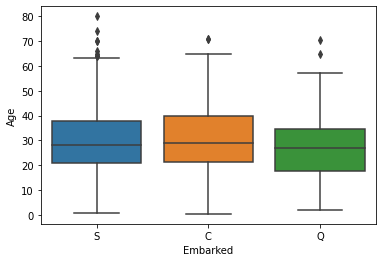

In [17]:
sns.boxplot(x=cat_features[3], y='Age', data=train)

In [18]:
np.floor(2/2)

1.0

In [19]:
print([*range(4)])

[0, 1, 2, 3]


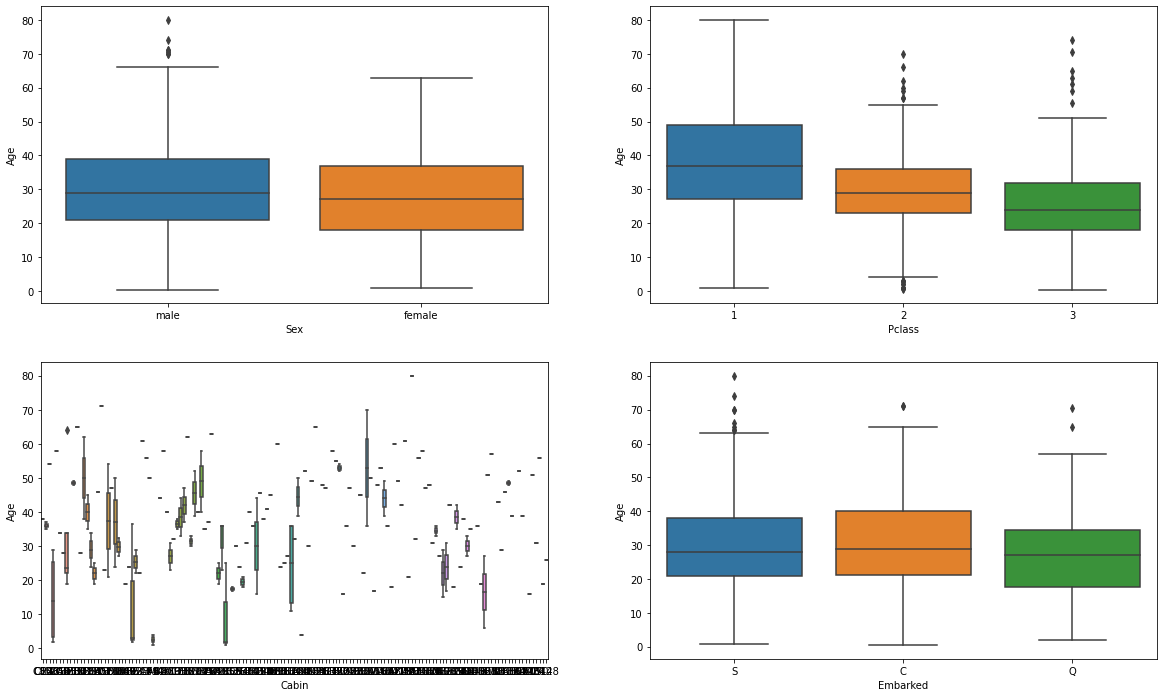

In [20]:
# Age x Categorical Features boxplot
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20,12))
for i, ax in zip(range(4), axes.flat):
    sns.boxplot(x=cat_features[i], y='Age', data=train, ax=ax)

In [21]:
axes.flat

### < Key Point >
- Age는 Pclass별로 유의미한 평균 차이를 나타내는 것으로 보임 <br>
    -> ANOVA 테스트로 유의미한 차이 나타내는지 검증 필요
- Cabin에 대한 전처리 필요한 것으로 보임

In [22]:
# ANOVA Pclass x Age
import scipy.stats as stats
Pclass1, Pclass2, Pclass3 = map(lambda x: train[(train['Pclass']==x)&(train['Age'].isna()==False)]['Age'], range(1,4))
F_stat, p_val = stats.f_oneway(Pclass1, Pclass2, Pclass3)


In [23]:
# F-statistic
print('F-statistic : {}'.format(np.round(F_stat, 5)))
print('p-value : {}'.format(p_val))

F-statistic : 57.44348
p-value : 7.487984171959904e-24


In [24]:
# ANOVA statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [25]:
 train[train['Age'].isna()==False][['Age', 'Pclass']].isna().sum()

Age       0
Pclass    0
dtype: int64

In [26]:
# ANOVA test
model = ols('Age ~ C(Pclass)',  train[train['Age'].isna()==False][['Age', 'Pclass']]).fit()
print(anova_lm(model))

              df         sum_sq       mean_sq          F        PR(>F)
C(Pclass)    2.0   20929.627754  10464.813877  57.443484  7.487984e-24
Residual   711.0  129527.008190    182.175820        NaN           NaN


In [27]:
# Tuckey의 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(train[train['Age'].isna()==False]['Age'], train[train['Age'].isna()==False]['Pclass'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-8.3558,0.0,-11.7041,-5.0075,True
1,3,-13.0928,0.0,-15.9622,-10.2234,True
2,3,-4.737,0.0005,-7.6763,-1.7977,True


## < Key Point >
- ANOVA 분석결과 P-Value 값이 0.05보다 작으므로, Pclass에 따라 평균이 유의미하게 차이가 난다고 말할 수 있음 <br>
    => Age 의 na 값을 Pclass의 평균값으로 처리

In [28]:
# Cabin
train[train['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='count'>

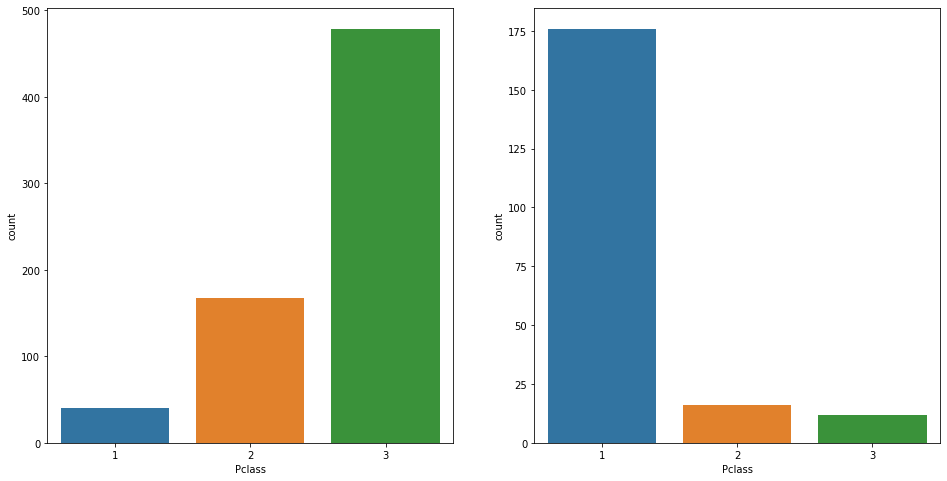

In [29]:
# Cabin x Pclass Na eda
fig, ax = plt.subplots(ncols=2, figsize=(16,8))
sns.countplot(data=train[train['Cabin'].isna()], x='Pclass', ax = ax[0])
sns.countplot(data=train[train['Cabin'].isna()==False], x='Pclass', ax=ax[1])

### < Key Point >
- Cabin 이 NA인 승객은 Pclass 3 의 비율이 높음
- Cabin 이 존재하는 승객의 Pclass는 1일 확률이 높음

<AxesSubplot:ylabel='Fare'>

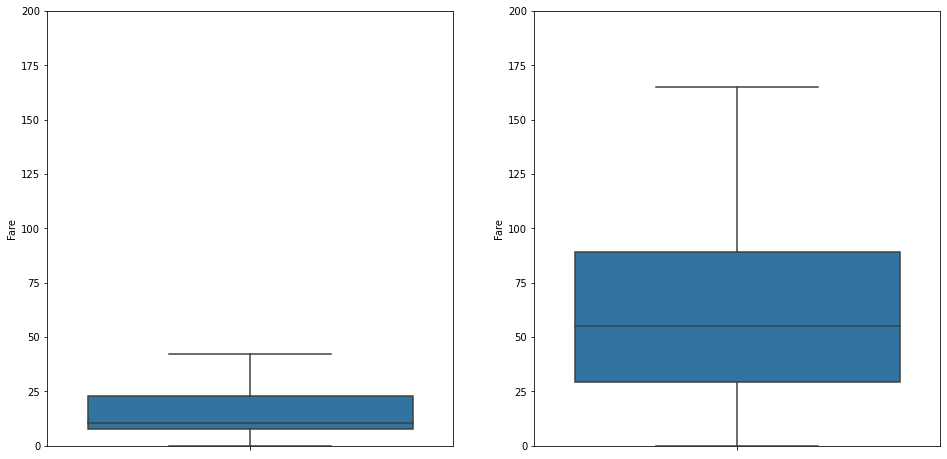

In [30]:
# Cabin x Fare Na eda
fig, ax = plt.subplots(ncols=2, figsize=(16,8))
ax[0].set_ylim(0,200)
ax[1].set_ylim(0,200)
sns.boxplot(data=train[train['Cabin'].isna()], y='Fare', showfliers = False, ax = ax[0])
sns.boxplot(data=train[train['Cabin'].isna()==False],  y='Fare', showfliers=False, ax=ax[1])

### < Key Point >
- Cabin이 NA 인 승객과 NA가 아닌 생극의 Fare가 차이남
- NA가 아닌 승객의 Pclass가 대부분 1이었던 것과 연관지으면
- Pclass 1일 수록 Fare가 높을 것으로 추정함

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

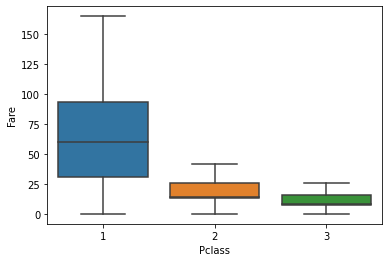

In [31]:
# Pclass vs Fare scatter plot
sns.boxplot(data=train, x='Pclass', y='Fare', showfliers=False)

### < Key Point >
- Pclass 1의 Fare가 높으며 Pclass 3의 Fare 가 낮음

In [32]:
# Cabin group
train['Cabin_group'] = train['Cabin'].str[:1]

<AxesSubplot:xlabel='Cabin_group', ylabel='Fare'>

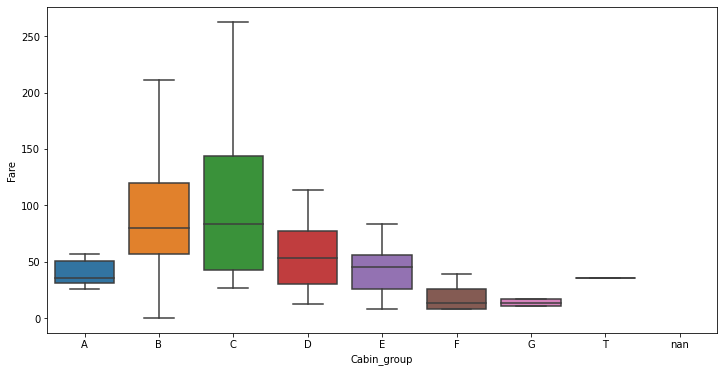

In [33]:
# Cabin group x Fare boxplot
seq = train.sort_values(['Cabin_group'])['Cabin_group'].unique().tolist()
plt.figure(figsize=(12,6))
sns.boxplot(data= train , x='Cabin_group', y='Fare', order=seq, showfliers=False)

/Users/hoeunsin/opt/anaconda3/envs/pj01/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


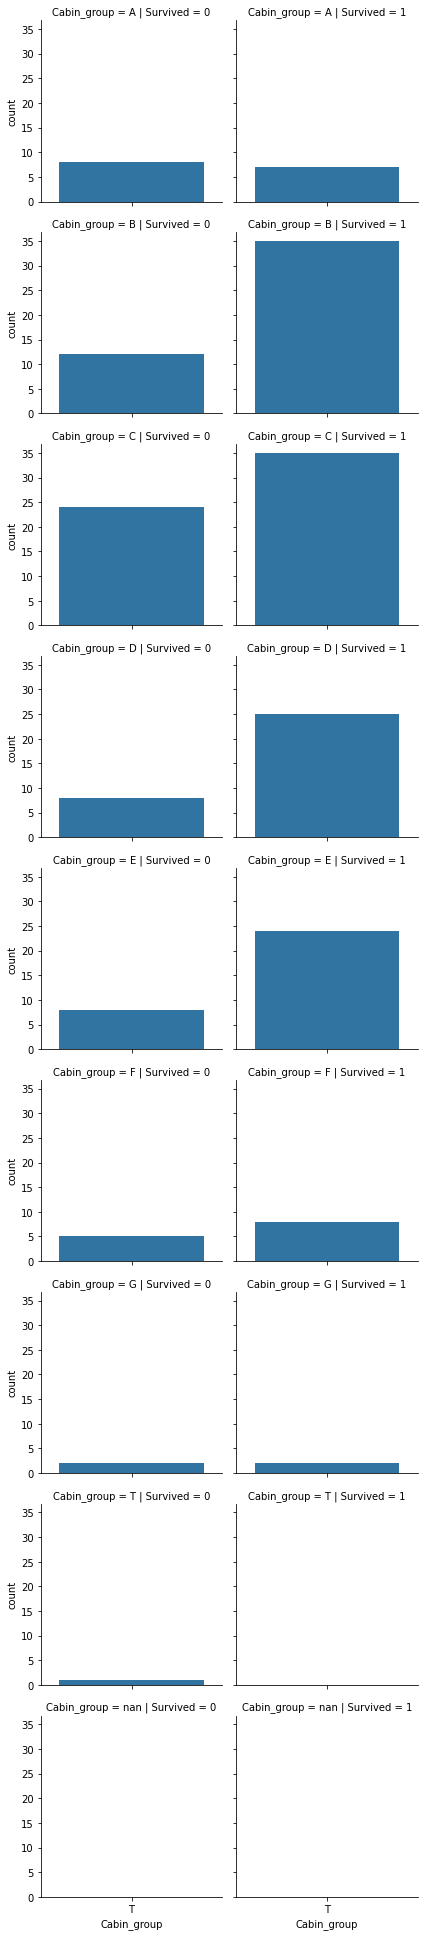

In [34]:
sns.FacetGrid(train, row='Cabin_group', col='Survived', row_order=seq).map(sns.countplot, 'Cabin_group')

<AxesSubplot:xlabel='Survived', ylabel='count'>

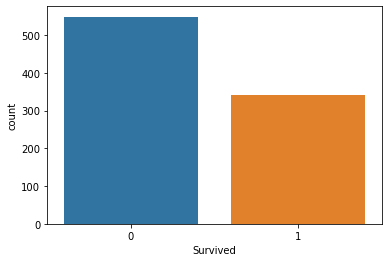

In [35]:
sns.countplot(data=train, x='Survived')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

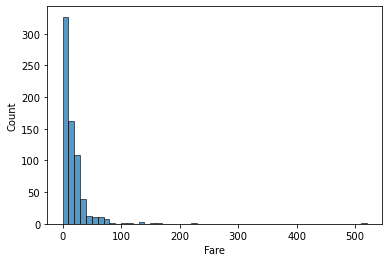

In [36]:
sns.histplot(data=train[train['Cabin'].isna()], x='Fare', binwidth=10)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

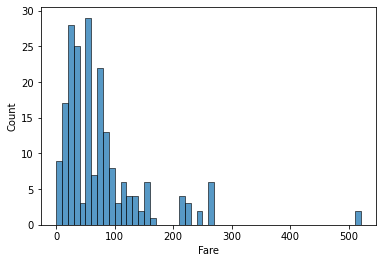

In [37]:
sns.histplot(data=train[train['Cabin'].isna()==False], x='Fare', binwidth=10)

In [38]:
# Cabin Decision Tree
cab_df = train[['PassengerId', 'Survived', 'Age', 'Pclass', 'SibSp', 'Fare', 'Cabin_group']]
cab_df.set_index('PassengerId', drop=True, inplace=True)
cab_df.dropna(inplace=True)

/var/folders/y3/bdz75q4d1356t5wbbnbbt8hc0000gn/T/ipykernel_19829/198556169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cab_df.dropna(inplace=True)


In [39]:
cab_f = cab_df[cab_df['Cabin_group'].isna()==False][cab_df.columns[cab_df.columns!='Cabin_group']]
cab_f

,Survived,Age,Pclass,SibSp,Fare
PassengerId,,,,,
2,1,38.0,1,1,71.2833
4,1,35.0,1,1,53.1000
7,0,54.0,1,0,51.8625
11,1,4.0,3,1,16.7000
12,1,58.0,1,0,26.5500
...,...,...,...,...,...
872,1,47.0,1,1,52.5542
873,0,33.0,1,0,5.0000
880,1,56.0,1,0,83.1583


In [40]:
cab_l = cab_df[cab_df['Cabin_group'].isna()==False][['Cabin_group']]
cab_l

,Cabin_group
PassengerId,
2,C
4,C
7,E
11,G
12,C
...,...
872,D
873,B
880,C


In [41]:
cab_l

,Cabin_group
PassengerId,
2,C
4,C
7,E
11,G
12,C
...,...
872,D
873,B
880,C


In [42]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(cab_l)
cab_l['Cabin_group'] = enc.transform(cab_l)

/Users/hoeunsin/opt/anaconda3/envs/pj01/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hoeunsin/opt/anaconda3/envs/pj01/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
cab_l

,Cabin_group
PassengerId,
2,2
4,2
7,4
11,6
12,2
...,...
872,3
873,1
880,2


In [44]:
from sklearn.tree import DecisionTreeClassifier
cab_clf = DecisionTreeClassifier()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
cvs = cross_val_score(cab_clf, cab_f, cab_l, scoring='accuracy',cv=5)
cvs

/Users/hoeunsin/opt/anaconda3/envs/pj01/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.37837838, 0.40540541, 0.62162162, 0.43243243, 0.45945946])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(cab_f, cab_l, test_size=0.2)

In [46]:
params = {'max_depth': [3,5,7], 'min_samples_split':[2,5,8,10], 'min_samples_leaf':[2,5,8]}

In [47]:
clf = DecisionTreeClassifier()

In [48]:
grid_clf = GridSearchCV(clf, param_grid=params, cv=5)

In [49]:
grid_clf.fit(X_train, y_train)

/Users/hoeunsin/opt/anaconda3/envs/pj01/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [2, 5, 8],
                         'min_samples_split': [2, 5, 8, 10]})

In [50]:
grid_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [2, 5, 8],
                         'min_samples_split': [2, 5, 8, 10]})

In [51]:
grid_clf.cv_results_['mean_test_score']

array([0.28942529, 0.28275862, 0.28275862, 0.30275862, 0.28275862,
       0.28275862, 0.28275862, 0.28275862, 0.27034483, 0.27034483,
       0.27034483, 0.27034483, 0.30988506, 0.28965517, 0.29655172,
       0.32988506, 0.30275862, 0.31609195, 0.30942529, 0.30275862,
       0.35172414, 0.35172414, 0.35172414, 0.35172414, 0.37034483,
       0.37011494, 0.40413793, 0.39747126, 0.35057471, 0.35724138,
       0.36390805, 0.35057471, 0.35885057, 0.35885057, 0.35885057,
       0.35885057])

In [52]:
grid_clf.best_score_

0.4041379310344827

In [53]:
grid_clf.best_params_

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 8}

In [54]:
# Embarked na 값
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_group
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


In [55]:
# Embarked valucounts
train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [56]:
# Embarked NA 
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_group
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


In [57]:
# Embarked NA 처리
train['Embarked'].fillna('S', inplace=True)

In [60]:
# Age NA 처리
train[train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_group
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,NaN
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,NaN
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,NaN
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,NaN
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,NaN


In [93]:
p_mean = train.groupby('Pclass')['Age'].mean().tolist()

In [94]:
train['Age'] = train.groupby('Pclass')['Age'].apply(lambda x : x.fillna(x.mean()))

In [99]:
train['Cabin'].fillna('N', inplace=True)
train['Cabin_group'].fillna('N', inplace=True)

In [100]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Cabin_group    0
dtype: int64

In [127]:
# select columns
df = train.drop(['PassengerId', 'Name', 'Cabin_group', 'Ticket'], axis=1)

In [128]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,N,S


In [129]:
f = df.loc[:,df.columns != 'Survived']
l = df.loc[:,'Survived']

In [130]:
f.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.25,N,S


In [131]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
for i in f.columns:
    enc = LabelEncoder()
    enc.fit(f[i])
    f[i] = enc.transform(f[i])

/var/folders/y3/bdz75q4d1356t5wbbnbbt8hc0000gn/T/ipykernel_19829/2210531605.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f[i] = enc.transform(f[i])


In [132]:
f.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,2,1,28,1,0,18,146,2
1,0,0,53,1,0,207,81,0


In [161]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [162]:
X_train, X_test, y_train, y_test = train_test_split(f, l, test_size=0.2)

In [171]:
params = {'max_depth':[2,3,4,5,6,7], 'min_samples_split':[2,3,4,5,6], 'min_samples_leaf':[2,3,4,5,6]}


In [172]:
clf = DecisionTreeClassifier()

In [173]:
grid = GridSearchCV(clf, param_grid=params, scoring='accuracy', cv=5)

In [174]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             scoring='accuracy')

In [175]:
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [176]:
grid.best_score_

0.8104304146557668

In [177]:
pred = grid.predict(X_test)

In [178]:
accuracy_score(y_test, pred)

0.8156424581005587